<h1>Exploring Titanic Dataset</h1>
<autor>by Javier Villarroel</autor>



<ol>
  <li><a href="#Features Engineering">Features Engineering</a>
    <ol>
      <li><a href="#Dummy Features">Dummy Features</a></li>
      <li><a href="#tunning">Parameters Tunning</a></li>
    </ol>
  </li>
  <li><a href="#pca">PCA components</a></li>
  <li><a href="#Predictions">Predictions</a></li>
</ol>

In [1]:
#Libraries to import

import numpy
import pandas
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.5)

In [2]:
# Import dataset 

titanic_train = pandas.read_csv('train.csv')
titanic_test = pandas.read_csv('test.csv')

VARIABLE DESCRIPTIONS:

<table width="100%">
  <tbody>
      <tr>
      <td>PassengerId <br>
      </td>

      <td> Passenger Identity Number <br>
      </td>
    </tr>
  
    <tr>
      <td>
        <p>Survived</p>
      </td>

      <td>Survival (1 = Yes, 0&nbsp;=&nbsp;No)</td>
    </tr>

    <tr>
      <td>PClass</td>

      <td>
        <p>Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)</p>
      </td>
    </tr>

    <tr>
      <td>Name</td>

      <td>Passanger Name</td>
    </tr>
    
        <tr>
      <td>Sex<br>
      </td>

      <td>Gender<br>
      </td>
    </tr>

    <tr>
      <td>Age</td>

      <td>Age</td>
    </tr>

    <tr>
      <td>Sibsp<br>
      </td>

      <td>Number of Siblings/&nbsp;Spouses Aboard<br>
      </td>
    </tr>

    <tr>
      <td>Parch</td>

      <td>Number of Parents/ Children Aboard</td>
    </tr>

    <tr>
      <td>Ticket<br>
      </td>

      <td>Ticket Number<br>
      </td>
    </tr>

    <tr>
      <td>Fare</td>

      <td>Passenger Fare</td>
    </tr>

    <tr>
      <td>Cabin</td>

      <td>Cabin</td>
    </tr>

    <tr>
      <td>Embarked</td>

      <td>Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)</td>
    </tr>
  </tbody>
</table>

In [3]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
titanic_train.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


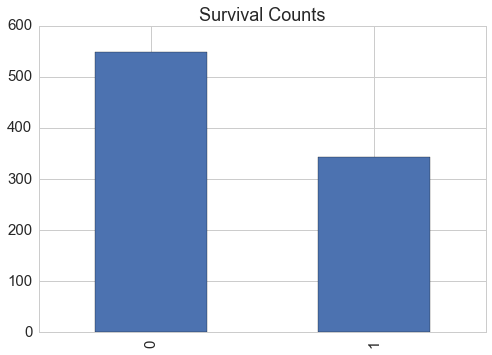

In [5]:
titanic_train['Survived'].value_counts().plot(kind='bar', title='Survival Counts')

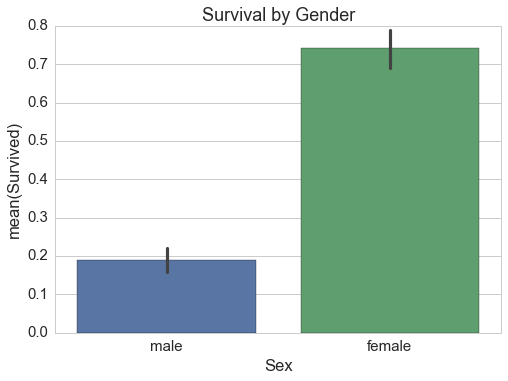

In [6]:
sns.barplot(x="Sex", y="Survived", data=titanic_train)
sns.plt.title('Survival by Gender')

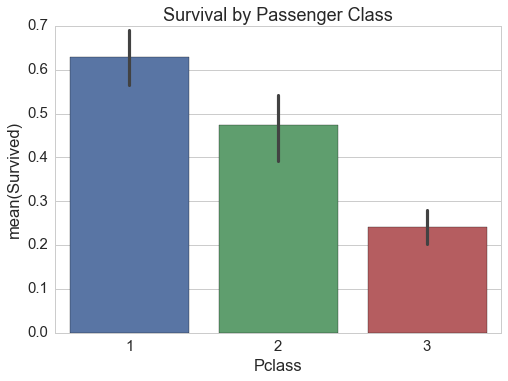

In [7]:
sns.barplot(x="Pclass", y="Survived", data=titanic_train)
sns.plt.title('Survival by Passenger Class')

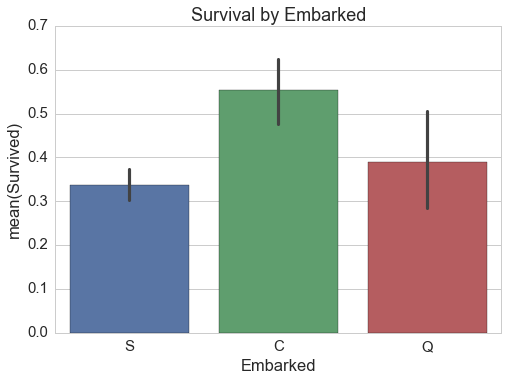

In [8]:
sns.barplot(x="Embarked", y="Survived", data=titanic_train)
sns.plt.title('Survival by Embarked')

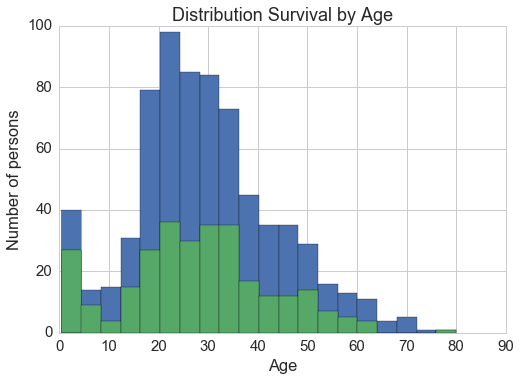

In [9]:
titanic_train["Age"].hist(bins=20)
titanic_train[titanic_train['Survived']==1]["Age"].hist(bins=20)
sns.plt.xlabel('Age')
sns.plt.ylabel('Number of persons')
sns.plt.title('Distribution Survival by Age')

Interesting! there were many kids

Remember, (891-714) 177 row haven't age values

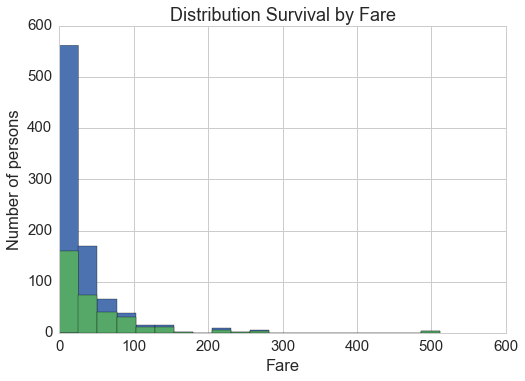

In [10]:
titanic_train["Fare"].hist(bins=20)
titanic_train[titanic_train['Survived']==1]["Fare"].hist(bins=20)
sns.plt.xlabel('Fare')
sns.plt.ylabel('Number of persons')
sns.plt.title('Distribution Survival by Fare')

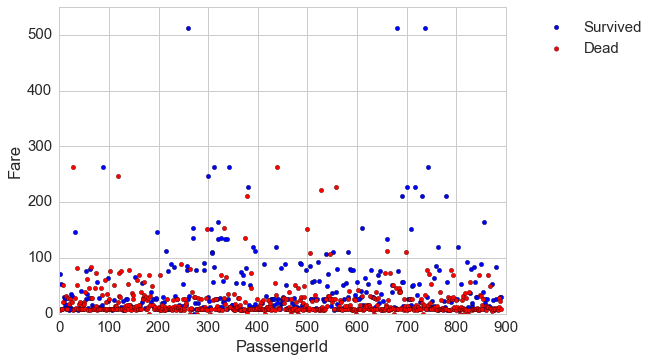

In [11]:

plt.scatter(titanic_train[titanic_train['Survived']==1]['PassengerId'],
            titanic_train[titanic_train['Survived']==1]['Fare'], c = 'b')
plt.scatter(titanic_train[titanic_train['Survived']==0]['PassengerId'],
            titanic_train[titanic_train['Survived']==0]['Fare'], c = 'r')

plt.xlabel('PassengerId')
plt.ylabel('Fare')
plt.xlim([0,900])
plt.ylim([0,550])
plt.legend(('Survived','Dead'),loc='upper left',fontsize=15,bbox_to_anchor=(1.05, 1))

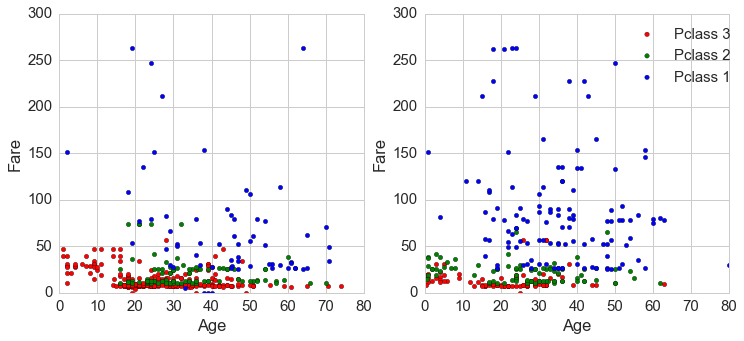

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
axes[0].scatter(titanic_train[(titanic_train['Survived']==0)&
                              (titanic_train['Pclass']==3)]['Age'],
                titanic_train[(titanic_train['Survived']==0)&
                              (titanic_train['Pclass']==3)]['Fare'], c = 'r')
axes[0].scatter(titanic_train[(titanic_train['Survived']==0)&
                              (titanic_train['Pclass']==2)]['Age'],
                titanic_train[(titanic_train['Survived']==0)&
                              (titanic_train['Pclass']==2)]['Fare'], c = 'g')
axes[0].scatter(titanic_train[(titanic_train['Survived']==0)&
                              (titanic_train['Pclass']==1)]['Age'],
                titanic_train[(titanic_train['Survived']==0)&
                              (titanic_train['Pclass']==1)]['Fare'], c = 'b')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Fare')
axes[0].set_xlim([0,80])
axes[0].set_ylim([0,300])

axes[1].scatter(titanic_train[(titanic_train['Survived']==1)&
                              (titanic_train['Pclass']==3)]['Age'],
                titanic_train[(titanic_train['Survived']==1)&
                              (titanic_train['Pclass']==3)]['Fare'], c = 'r')
axes[1].scatter(titanic_train[(titanic_train['Survived']==1)&
                              (titanic_train['Pclass']==2)]['Age'],
                titanic_train[(titanic_train['Survived']==1)&
                              (titanic_train['Pclass']==2)]['Fare'], c = 'g')
axes[1].scatter(titanic_train[(titanic_train['Survived']==1)&
                              (titanic_train['Pclass']==1)]['Age'],
                titanic_train[(titanic_train['Survived']==1)&
                              (titanic_train['Pclass']==1)]['Fare'], c = 'b')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Fare')
axes[1].set_xlim([0,80])
axes[1].set_ylim([0,300])
axes[1].legend(('Pclass 3','Pclass 2', 'Pclass 1'),fontsize=15,bbox_to_anchor=(1.05, 1))

<h1>Features Engineering<a name="Features Engineering"></a></h1>


In [13]:
def Sex_encode(val):
    if val == 'female':
        return 1
    else:
        return 0
    
titanic_train['Sex_n'] = titanic_train['Sex'].apply(Sex_encode) 
titanic_test['Sex_n'] = titanic_test['Sex'].apply(Sex_encode)

In [14]:
#I remove outliers in Fare
titanic_train = titanic_train[titanic_train['Fare'] < 450]

#there is one NaN value in test['Fare'], it is changed by a similar person in the data
titanic_test['Fare'] = titanic_test['Fare'].fillna(6.24)

titanic_train['Embarked'] = titanic_train['Embarked'].fillna('Q')

In [15]:
def title_name(name):
    title = name.split('.')[0]
    title = title.split(',')[1]
    return title

titanic_train['name_title'] = titanic_train['Name'].apply(title_name).copy()
titanic_test['name_title'] = titanic_test['Name'].apply(title_name).copy()

In [16]:
#different titles

titanic_train = titanic_train.replace([' Capt', ' Col', ' Major', ' Dr', ' Officer', ' Rev'], 
                     ['officer','officer','officer','officer','officer','officer'])
titanic_train = titanic_train.replace([' Dona', ' Lady', ' the Countess'], 
                     ['Lady','Lady','Lady'])
titanic_train = titanic_train.replace([' Don', ' Jonkheer', ' Sir'], 
                     ['Sir','Sir','Sir'])
titanic_train = titanic_train.replace([' Mme', ' Mrs'], 
                     ['Mrs','Mrs'])
titanic_train = titanic_train.replace([' Miss', ' Mmes', ' Mlle', ' Ms'], 
                     ['Miss','Miss','Miss', 'Miss'])
titanic_train = titanic_train.replace([' Mr', ' Master'], 
                     ['Mr','Master'])

titanic_test = titanic_test.replace([' Capt', ' Col', ' Major', ' Dr', ' Officer', ' Rev'], 
                     ['officer','officer','officer','officer','officer','officer'])
titanic_test = titanic_test.replace([' Dona', ' Lady', ' the Countess'], 
                     ['Lady','Lady','Lady'])
titanic_test = titanic_test.replace([' Don', ' Jonkheer', ' Sir'], 
                     ['Sir','Sir','Sir'])
titanic_test = titanic_test.replace([' Mme', ' Mrs'], 
                     ['Mrs','Mrs'])
titanic_test = titanic_test.replace([' Miss', ' Mmes', ' Mlle', ' Ms'], 
                     ['Miss','Miss','Miss', 'Miss'])
titanic_test = titanic_test.replace([' Mr', ' Master'], 
                     ['Mr','Master'])


titanic_train['name_title'].value_counts()

Mr         515
Miss       184
Mrs        126
Master      40
officer     18
Sir          3
Lady         2
Name: name_title, dtype: int64

<h2>Dummy Features<a href="#Dummy Features"></a></h2>

In [17]:
#Creation of Dummy features for Sex, Embarker, Pclass

def dummy_features(df):
    new_embarked = pandas.get_dummies(df['Embarked'],prefix='Embarked')
    #new_sex = pandas.get_dummies(df['Sex'])
    new_Pclass = pandas.get_dummies(df['Pclass'],prefix='Pclass')
    new_title = pandas.get_dummies(df['name_title'],prefix='titles')
    new_df = pandas.concat([new_embarked,new_Pclass,new_title],axis=1)
    return new_df

In [18]:
pre_train = pandas.concat([titanic_train,dummy_features(titanic_train)],axis=1)
pre_test = pandas.concat([titanic_test,dummy_features(titanic_test)],axis=1)

In [19]:
#Sustitution of Nan in Age, by a decision tree model

def age_sustitor(train, test):
    age = pandas.concat([train,test],axis=0)
    age_train = age[age['Age']==age['Age']].copy()
    
    from sklearn.tree import DecisionTreeRegressor
    col = ['SibSp','Parch','Fare', 
      'Embarked_C', 'Embarked_S',  
       'Pclass_1','Pclass_3'
    ]
    age_model = DecisionTreeRegressor(min_samples_split=10,random_state=100)
    age_model.fit(age_train[col],age_train['Age'])
    return {'col': col, 'model': age_model}

age_model = age_sustitor(pre_train,pre_test)

In [20]:
def age_sustitution(row):
    if row['Age'] != row['Age']:
        return age_model['model'].predict([row[age_model['col']]])[0]
    else:
        return row['Age']
    
pre_train['Age_n'] = pre_train.apply(age_sustitution, axis=1)
pre_test['Age_n']  = pre_test.apply(age_sustitution, axis=1)

In [21]:
pre_train['Fare_n'] = pre_train['Fare']/270
pre_test['Fare_n'] = pre_test['Fare']/270
pre_train['SibSp_n'] = pre_train['SibSp']/8
pre_test['SibSp_n'] = pre_test['SibSp']/8
pre_train['Parch_n'] = pre_train['Parch']/6
pre_test['Parch_n'] = pre_test['Parch']/6

In [22]:
pre_train['Parch'].value_counts()

0    676
1    117
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [23]:
# Drop the Age, Sex, Cabin 
train = pre_train.drop(['Age','Sex','Cabin','Ticket','Name','SibSp','Parch','Pclass',
                    'Embarked','name_title','Fare','Survived'],axis=1) 
test = pre_test.drop(['Age','Sex','Cabin','Ticket','Name','SibSp','Parch','Pclass',
                  'Embarked','name_title','Fare'],axis=1) 
target = pre_train['Survived']

In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 888 entries, 0 to 890
Data columns (total 19 columns):
PassengerId       888 non-null int64
Sex_n             888 non-null int64
Embarked_C        888 non-null uint8
Embarked_Q        888 non-null uint8
Embarked_S        888 non-null uint8
Pclass_1          888 non-null uint8
Pclass_2          888 non-null uint8
Pclass_3          888 non-null uint8
titles_Lady       888 non-null uint8
titles_Master     888 non-null uint8
titles_Miss       888 non-null uint8
titles_Mr         888 non-null uint8
titles_Mrs        888 non-null uint8
titles_Sir        888 non-null uint8
titles_officer    888 non-null uint8
Age_n             888 non-null float64
Fare_n            888 non-null float64
SibSp_n           888 non-null float64
Parch_n           888 non-null float64
dtypes: float64(4), int64(2), uint8(13)
memory usage: 59.8 KB


<h1>Take a view on Stadistic</h1>

In [25]:
#function to highlight correlations
def correlated(val):
    
    if val != 1.0 and (val > 0.1 or val < -0.1):
        return 'color : {0}'.format("red")
    else:
        return 'color : {0}'.format("black")

corr = train.corr()
corr.style.applymap(correlated).format("{:.2f}")

looks like there is correlations (>|0.1|) between:

-Survived and Fare, Embarked_C, Embarked_S, female, male, Pclass_1, Pclass_3

-Age and Fare, SibSp, Parch, Pclass_1, Pclass_3

It is logic that if you are young, your traveling with familiars, so Age, SibSp and Parch      are correlated

-Fare and Sex, Embarked_C and S, Pclass_1 and 3

It logic thar the price of the ticket are correlated with where people embarked, what class   they buy, how many people trabvel together and the gender 100 year ago. So, this features     could be reduced.

I thinks that PassengerId, SibSp and Parch aren't relevant, Embarked_Q and Pclass_2 neither.  but Age doesn't look relevant but this is not very logic for me.

In [29]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

clf = ExtraTreesClassifier(n_estimators=200)
clf = clf.fit(train, target)

features = pandas.DataFrame()
features['feature'] = train.columns
features['importance'] = clf.feature_importances_

features.sort(['importance'],ascending=False)


/Users/javi/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:11: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,feature,importance
0,PassengerId,0.160731
15,Age_n,0.148823
16,Fare_n,0.145778
1,Sex_n,0.125190
11,titles_Mr,0.116285
7,Pclass_3,0.054894
17,SibSp_n,0.042191
10,titles_Miss,0.036553
12,titles_Mrs,0.035094
5,Pclass_1,0.032262


In [38]:
model = SelectFromModel(clf, prefit=True)
train_new = model.transform(train)
train_new.shape

array([[  1.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          1.00000000e+00,   2.20000000e+01,   2.68518519e-02],
       [  2.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   3.80000000e+01,   2.64012222e-01],
       [  3.00000000e+00,   1.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   2.60000000e+01,   2.93518519e-02],
       ..., 
       [  8.89000000e+02,   1.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   1.20212500e+01,   8.68518519e-02],
       [  8.90000000e+02,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   2.60000000e+01,   1.11111111e-01],
       [  8.91000000e+02,   0.00000000e+00,   1.00000000e+00,
          1.00000000e+00,   3.20000000e+01,   2.87037037e-02]])

<h2>PCA Components<a name="pca"></a></h2>

In [31]:
from sklearn.decomposition import PCA

In [33]:
col = ['Sex_n','SibSp', 'Age',
       'Parch', 'Fare', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'female', 'male', 'Pclass_1', 'Pclass_2',
       'Pclass_3']

pca_df = train 
pca_df_norm = (pca_df - pca_df.mean()) / (pca_df.max() - pca_df.min())
pca = PCA()
pca.fit(pca_df_norm)

pcaResult = pca.explained_variance_

for i in range(len(pcaResult)):
    print("{0}\t{1:.2f}".format(pca_df.columns[i],pcaResult[i]))  


PassengerId	0.59
Sex_n	0.38
Embarked_C	0.34
Embarked_Q	0.19
Embarked_S	0.16
Pclass_1	0.10
Pclass_2	0.08
Pclass_3	0.08
titles_Lady	0.03
titles_Master	0.02
titles_Miss	0.01
titles_Mr	0.01
titles_Mrs	0.01
titles_Sir	0.00
titles_officer	0.00
Age_n	0.00
Fare_n	0.00
SibSp_n	0.00
Parch_n	0.00


<h1>Predictions<a name="predictions"></a></h1>

In [34]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score

/Users/javi/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [36]:
models = {}

models['LR'] = {'name': 'Logistic Regression', 'model': LogisticRegression()}
models['SVC'] = {'name': 'Suport Vector Machine', 'model': SVC()}
models['RF'] = {'name': 'Random Forest', 'model': RandomForestClassifier()}
models['KN'] = {'name': 'KNeighbors', 'model': KNeighborsClassifier()}
models['GNB'] = {'name': 'Gaussian Naives Bayes', 'model': GaussianNB()}
models['Ada'] = {'name': 'AdaBoost', 'model': AdaBoostClassifier()}
models['XGB'] = {'name': 'XGBoost', 'model': XGBClassifier()}
models['DT'] = {'name': 'Decision Trees', 'model': DecisionTreeClassifier()}

<h3>First shot</h3>

In [58]:
aaa = features.sort(['importance'],ascending=False)['feature']
list(aaa)

/Users/javi/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


['PassengerId',
 'Age_n',
 'Fare_n',
 'Sex_n',
 'titles_Mr',
 'Pclass_3',
 'SibSp_n',
 'titles_Miss',
 'titles_Mrs',
 'Pclass_1',
 'Parch_n',
 'titles_Master',
 'Pclass_2',
 'Embarked_S',
 'Embarked_C',
 'Embarked_Q',
 'titles_officer',
 'titles_Sir',
 'titles_Lady']

In [107]:
col = [
 'PassengerId',
 'Age_n',
 'Fare_n',
 'Sex_n',
 'titles_Mr',
 'Pclass_3',
 'SibSp_n',
 'titles_Miss',
 'titles_Mrs',
 'Pclass_1',
 'Parch_n',
# 'titles_Master',
# 'Pclass_2',
# 'Embarked_S',
# 'Embarked_C',
# 'Embarked_Q',
# 'titles_officer',
# 'titles_Sir',
# 'titles_Lady'
]

limit = int(0.8 * train.shape[0])

X_train = train[col].iloc[:limit,:]
y_train = target.iloc[:limit]
X_test = train[col].iloc[limit:,:]
y_test = target.iloc[limit:]


In [108]:
for i in models:
    models[i]['model'].fit(X_train,y_train)
    score = models[i]['model'].score(X_train, y_train)
    predict = models[i]['model'].predict(X_test)
    acu = accuracy_score(predict, y_test)
    print("{0}\n score:\t{1:0.4f}\n acc:\t{2:0.4f}".format(models[i]['name'],score,acu))
    try:
        print(["%0.2f" % i for i in models[i]['model'].feature_importances_])
    except Exception: 
        pass

Gaussian Naives Bayes
 score:	0.7831
 acc:	0.8090
KNeighbors
 score:	0.6944
 acc:	0.3652
XGBoost
 score:	0.9324
 acc:	0.8202
['0.30', '0.25', '0.27', '0.03', '0.03', '0.03', '0.04', '0.01', '0.02', '0.01', '0.02']
Logistic Regression
 score:	0.8085
 acc:	0.8146
AdaBoost
 score:	0.8141
 acc:	0.8315
['0.04', '0.14', '0.24', '0.08', '0.18', '0.08', '0.12', '0.00', '0.00', '0.06', '0.06']
Suport Vector Machine
 score:	0.8197
 acc:	0.6573
Random Forest
 score:	0.9493
 acc:	0.8427
['0.16', '0.15', '0.17', '0.11', '0.16', '0.06', '0.05', '0.04', '0.04', '0.03', '0.03']
Decision Trees
 score:	0.9211
 acc:	0.8034
['0.12', '0.16', '0.19', '0.02', '0.38', '0.09', '0.01', '0.00', '0.00', '0.02', '0.00']


<h2>Parameters Tunning<a name="tunning"></a></h2>

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [68]:


models['SVC']['parameters grid'] = {'name': 'Suport Vector Machine', 'model': SVC()}
models['RF']['parameters grid'] = {'name': 'Random Forest', 'model': RandomForestClassifier()}
models['KN']['parameters grid'] = {'name': 'KNeighbors', 'model': KNeighborsClassifier()}
models['GNB']['parameters grid'] = {'name': 'Gaussian Naives Bayes', 'model': GaussianNB()}
models['Ada']['parameters grid'] = {'name': 'AdaBoost', 'model': AdaBoostClassifier()}
models['XGB']['parameters grid'] = {'name': 'XGBoost', 'model': XGBClassifier()}
models['DT']['parameters grid'] = {'name': 'Decision Trees', 'model': DecisionTreeClassifier()}

In [88]:


X = train[col]
y = target
x = test[col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [103]:
models['SVC']['parameters grid'] = {
    'kernel': ['rbf'], 
    'gamma': [1e-2,1e-3, 1e-4],
    'C': [1, 10, 100, 1000]
}

models['RF']['parameters grid'] = {
    'n_estimators': [5,10, 50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_split': [2,4,5,8,10],
    'criterion': ['gini','entropy']
}

models['DT']['parameters grid'] = {
    'min_samples_split':[2,5,10,15,20,23,25]
}

models['Ada']['parameters grid'] = {
    'n_estimators': [10,20, 25, 30,50], 
    'learning_rate': [0.2,0.8, 1.0, 1.2]
}

models['XGB']['parameters grid'] = {
        'max_depth': [5, 9, 12,20, 25],
        'subsample': [0.2,0.5,0.9, 1.0]
}


In [104]:
for cls in models:
    try:
        parameters = models[cls]['parameters grid']
    except Exception:
        continue
    try:
        clf = GridSearchCV(models[cls]['model'], models[cls]['parameters grid'], 
                       cv=5,scoring='accuracy')
        clf.fit(X_train, y_train)
        models[cls]['Best parameters'] = clf.best_params_

        print(models[cls]['name'] )
        print("Best parameters: ",models[cls]['Best parameters'] )
        print("Best score: ", clf.cv_results_['mean_test_score'].max())
    except:
        continue

XGBoost
Best parameters:  {'subsample': 0.9, 'max_depth': 5}
Best score:  0.8367003367
AdaBoost
Best parameters:  {'learning_rate': 1.2, 'n_estimators': 20}
Best score:  0.829966329966
Suport Vector Machine
Best parameters:  {'gamma': 0.0001, 'C': 1000, 'kernel': 'rbf'}
Best score:  0.782828282828
Random Forest
Best parameters:  {'criterion': 'entropy', 'max_features': 'log2', 'n_estimators': 10, 'min_samples_split': 8}
Best score:  0.853535353535
Decision Trees
Best parameters:  {'min_samples_split': 25}
Best score:  0.809764309764


<h3>Second Shot</h3>

In [96]:

for i in models:
    try:
        parameters = models[i]['Best parameters']
        models[i]['model'].set_params(**parameters)
    except Exception: 
        pass
    
    models[i]['model'].fit(X_train,y_train)
    score = models[i]['model'].score(X_train,y_train)
    predict = models[i]['model'].predict(X_test)
    acu = accuracy_score(predict, y_test)
    print("{0}\n score:\t{1:0.4f}\n acc:\t{2:0.4f}".format(models[i]['name'],score,acu))
    try:
        print(["%0.2f" % i for i in models[i]['model'].feature_importances_])
    except Exception: 
        pass

Gaussian Naives Bayes
 score:	0.7980
 acc:	0.7585
KNeighbors
 score:	0.6936
 acc:	0.5544
XGBoost
 score:	0.9495
 acc:	0.8129
['0.29', '0.26', '0.27', '0.03', '0.03', '0.03', '0.04', '0.01', '0.01', '0.02', '0.02']
Logistic Regression
 score:	0.8249
 acc:	0.7789
AdaBoost
 score:	0.8300
 acc:	0.7857
['0.02', '0.20', '0.10', '0.04', '0.18', '0.08', '0.12', '0.00', '0.08', '0.14', '0.04']
Suport Vector Machine
 score:	0.8434
 acc:	0.7653
Random Forest
 score:	0.9478
 acc:	0.8095
['0.14', '0.15', '0.16', '0.14', '0.14', '0.07', '0.05', '0.04', '0.05', '0.04', '0.03']
Decision Trees
 score:	0.9276
 acc:	0.7755
['0.09', '0.14', '0.20', '0.02', '0.41', '0.11', '0.02', '0.01', '0.00', '0.00', '0.01']


In [90]:
from sklearn.ensemble import VotingClassifier

In [98]:
estimators = [(i,models[i]['model']) for i in models]
eclf1 = VotingClassifier(estimators=estimators, voting='hard',weights=[1,1,5,3,3,2,5,5])
eclf1.fit(X, y)
p = eclf1.predict(X_test)
print(accuracy_score(p, y_test))

0.894557823129


In [99]:
Train = train[col]
y_Train = target
Test = test[col]

eclf1.fit(Train, y_Train)
recontra_sub = eclf1.predict(Test)

In [100]:
recontra_sub.shape

(418,)

In [101]:
submission = pandas.DataFrame({'PassengerId': test['PassengerId'],
                               'Survived': recontra_sub})
submission.to_csv("submission_3.csv",index=False)

<h2>Testing the results</h2>

In [109]:
titanic_test['Survived_3'] = recontra_sub

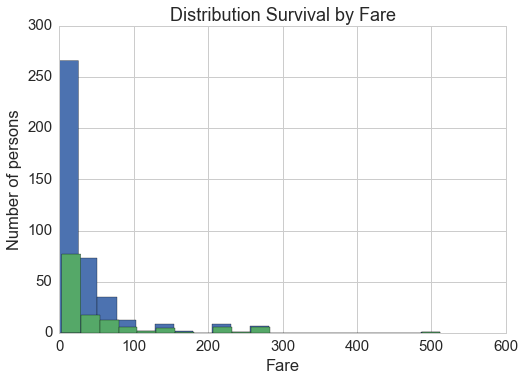

In [111]:
titanic_test["Fare"].hist(bins=20)
titanic_test[titanic_test['Survived_3']==1]["Fare"].hist(bins=20)
sns.plt.xlabel('Fare')
sns.plt.ylabel('Number of persons')
sns.plt.title('Distribution Survival by Fare')

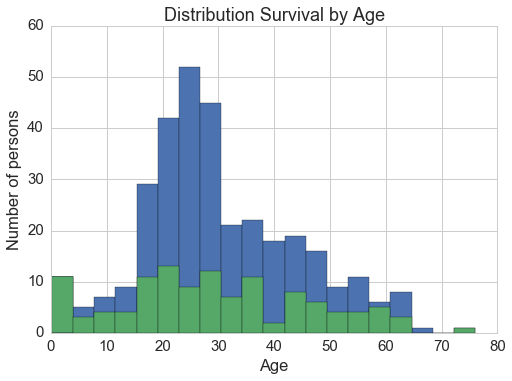

In [113]:
titanic_test["Age"].hist(bins=20)
titanic_test[titanic_test['Survived_3']==1]["Age"].hist(bins=20)
sns.plt.xlabel('Age')
sns.plt.ylabel('Number of persons')
sns.plt.title('Distribution Survival by Age')

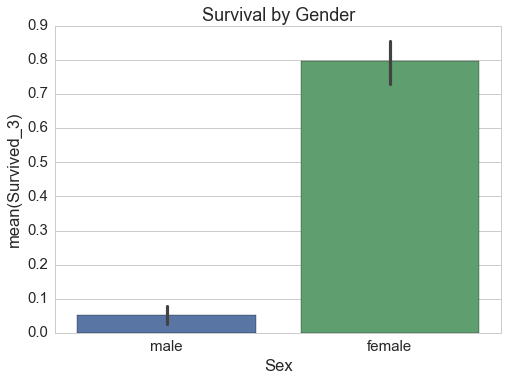

In [114]:
sns.barplot(x="Sex", y="Survived_3", data=titanic_test)
sns.plt.title('Survival by Gender')